In [39]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# lets calc e density of 

C_e = 6 
H_e = 1
O_e = 8

mol_e = 5 * C_e + 8 * H_e + 2 * O_e
mol_e * (1/100.12) * 1.17

0.6310427487015581

In [10]:
r_e = 2.818e-20 * (u.m**2) # (m^2?)
thomps_cross = (8 * np.pi * r_e ** 2)/3
(thomps_cross/(1e-25 * u.cm **2)).decompose()




<Quantity 6.652740485238823e-10 m2>

In [18]:
energy = 0.662 * u.MeV
freq = energy/const.h
gamma = (const.c * freq / (const.m_e * const.c**2)).value
cross = np.pi * r_e **2
inside = np.log(1+2*gamma)/gamma**3 
inside = inside + (2*(1+gamma)*(2*gamma**2-2*gamma-1))/(gamma**2 * (1+2*gamma)**2)
inside = inside + (8 * gamma**2)/(3 * (1+2*gamma)**3)
cross = cross*inside
(cross/(1e-25*u.cm**2)).decompose()
         

<Quantity 9.092394061420943e-65 m2>

In [36]:
def energy_to_wavelength(energy):
    # e = h f; c = lambda * f
    freq = energy / const.h
    wavelength = const.c/freq
    return wavelength

def wavelength_to_energy(wavelength):
    freq = const.c /wavelength
    energy = const.h * freq
    return energy

def energy_to_volts(energy):
    volts = (energy/const.e.si).to(u.V)
    return volts

def volts_to_energy(volts):
    energy = (volts * const.e.si).to(u.MeV)
    return energy

theta = 40 * u.deg

energy0 = 0.662 * u.MeV
# ev = V * charge


def compton(wavelength0, theta):
    new_wavelength = (const.h/(const.m_e * const.c)) * (1-np.cos(theta))
    return new_wavelength.decompose()

wavelength0 = energy_to_wavelength(energy0)
new_wavelength = compton(wavelength0, theta)
new_energy = wavelength_to_energy(new_wavelength)
new_volts = energy_to_volts(new_energy)
new_volts

<Quantity 2184170.93577747 V>

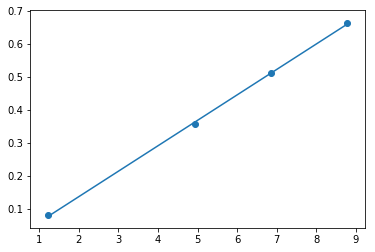

In [54]:
y = np.array([0.081,0.356,0.511,0.662]) # MeV
x = np.array([1.23,4.94,6.86,8.77]) # peak volt

fit_m, fit_b = np.polyfit(x,y,1)

def calib_fit(x):
    return fit_m * x + fit_b

test_y = calib_fit(x)
    
fig,ax = plt.subplots(1,1)
ax.plot(x, test_y)
ax.scatter(x,y)



In [55]:
calib_fit(7)

0.52194411017085496

In [ ]:
np.readtxt()